# Projet 4: Anticipez les besoins en consommation électrique des bâtiments
## Notebook de nettoyage
*Julie Neury-ormanni*

## Sommaire <a class="anchor" id="sommaire"></a>
## [Contexte du projet](#1)<a class="anchor" id="sommaire"></a>
## [Import des librairies](#2)<a class="anchor" id="sommaire"></a>
## [Chargement des données](#3)<a class="anchor" id="sommaire"></a>
## [Nettoyage du jeu de données](#4)<a class="anchor" id="sommaire"></a>
### [Description du jeu de données](#5)<a class="anchor" id="sommaire"></a>
### [Réconciliation des jeux de données](#6)<a class="anchor" id="sommaire"></a>
#### [Correction des noms des colonnes du jeu de données de 2015](#7)<a class="anchor" id="sommaire"></a>
#### [Vérification des colonnes non-communes aux deux dataframes](#8)<a class="anchor" id="sommaire"></a>
#### [Transformation des colonnes du dataframe de 2015](#9)<a class="anchor" id="sommaire"></a>
#### [Completion du dataframe 2016 avec des bâtiments de 2015](#10)<a class="anchor" id="sommaire"></a>
### [Les valeurs manquantes](#11)<a class="anchor" id="sommaire"></a>
### [Vérification du format des variables](#12)<a class="anchor" id="sommaire"></a>
### [Imputation des variables](#13)<a class="anchor" id="sommaire"></a>
#### [Imputation par des valeurs d'une variable connue](#14)<a class="anchor" id="sommaire"></a>
#### [Uniformisation des valeurs manquantes](#15)<a class="anchor" id="sommaire"></a>
#### [Correction des valeurs à plusieurs orthographes](#16)<a class="anchor" id="sommaire"></a>
### [Filtration des données](#17)<a class="anchor" id="sommaire"></a>
#### [Suppression des données non-conformes](#18)<a class="anchor" id="sommaire"></a>
#### [Vérification de la fiabilité des mesures](#19)<a class="anchor" id="sommaire"></a>
## [Exploration des variables](#20)<a class="anchor" id="sommaire"></a>
### [Sélection des variables qualitatives](#21)<a class="anchor" id="sommaire"></a>
### [Sélection des variables quantitatives](#22)<a class="anchor" id="sommaire"></a>
#### [Corrélations entre variables](#23)<a class="anchor" id="sommaire"></a>
#### [Distribution des variables](#24)<a class="anchor" id="sommaire"></a>
#### [Transformation des valeurs](#25)<a class="anchor" id="sommaire"></a>
## [Export au format csv](#26)<a class="anchor" id="sommaire"></a>
## [Conclusion](#27)<a class="anchor" id="sommaire"></a>

-----------------------------------------------------------------------------------------------------------------------

## [Contexte du projet](#sommaire)<a class="anchor" id="1"></a>

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments. Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées. Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

## [Import des librairies](#sommaire)<a class="anchor" id="2"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

In [2]:
# Paramétrage des options d'affichage
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 10000000000)

## [Chargement des données](#sommaire)<a class="anchor" id="3"></a>

In [3]:
df_2015 =  pd.read_csv(r'C:\Users\neury\Documents\Python\P4\entrees\2015-building-energy-benchmarking.csv')

In [4]:
df_2016 =  pd.read_csv(r'C:\Users\neury\Documents\Python\P4\entrees\2016-building-energy-benchmarking.csv')

## [Nettoyage du jeu de données](#sommaire)<a class="anchor" id="4"></a>

### [Description du jeu de données](#sommaire)<a class="anchor" id="5"></a>

In [ ]:
df_2015.shape

In [ ]:
df_2016.shape

In [ ]:
df_2015.info()

In [ ]:
df_2016.info()

### [Réconciliation des jeux de données](#sommaire)<a class="anchor" id="6"></a>

In [ ]:
df_2015.Location[0]

#### [Correction des noms des colonnes du jeu de données de 2015](#sommaire)<a class="anchor" id="7"></a>

In [5]:
df_2015.rename(columns = {'Zip Codes':'ZipCode','GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions','GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'}, inplace = True)

#### [Vérification des colonnes non-communes aux deux dataframes](#sommaire)<a class="anchor" id="8"></a>

In [ ]:
# Listes des colonnes de chaque dataframe
col2015 = df_2015.columns.tolist()
col2016 = df_2016.columns.tolist()

# Colonnes uniquement dans dataframe 2016
print('Colonnes 2016 qui n\'apparaissent pas dans 2015 :')
print("-","\n- ".join([ x for x in col2016 if x not in col2015]), "\n")

# Colonnes uniquement dans dataframe 2015
print('Colonnes 2015 qui n\'apparaissent pas dans 2016 :')
print("-", "\n- ".join([ x for x in col2015 if x not in col2016]))

#### [Transformation des colonnes du dataframe de 2015](#sommaire)<a class="anchor" id="9"></a>

In [6]:
# Transformation de la colonne location de 2015, en plusieurs colonnes comme 2016

# Transformation de Location : dictionnaire en liste puis en colonnes de dataframe
location_to_df = pd.DataFrame(df_2015.Location.map(eval).tolist())

# Transformation de l'adresse : dictionnaire en liste puis en colonnes de dataframe
adress_to_df = pd.DataFrame(location_to_df.human_address.map(eval).tolist())

# Fusion et sauvegarde des localisations et adresses dans un dataframe temporaire
df_location = pd.concat([location_to_df, adress_to_df], axis=1)

# Création des nouvelles colonnes dans 2015
df_2015['Address'] = df_location['address']
df_2015['City'] = df_location['city']
df_2015['State'] = df_location['state']
df_2015['ZipCode'] = df_location['zip']
df_2015['Latitude'] = df_location['latitude']
df_2015['Longitude'] = df_location['longitude']

In [7]:
#Suppression des colonnes en trop en 2016 
df_2016.drop(columns =['Comments'], inplace = True)

In [8]:
# Adaptation de l'ordre des colonnes 
df_2015 = df_2015[df_2016.columns]

#### [Completion du dataframe 2016 avec des bâtiments de 2015](#sommaire)<a class="anchor" id="10"></a>

In [9]:
# Chercher les Bâtiments différents entre 2015 et 2016
different_buildings = set(df_2015['OSEBuildingID']).difference(set(df_2016['OSEBuildingID']))
# Créer une liste de ces bâtiments
missing_buildings = list(different_buildings)
#Puis un df
missing_buildings_to_2016 = df_2015[df_2015['OSEBuildingID'].isin(missing_buildings)]
# concaténer les deux dataframes pour compléter les bâtiments non renseignés en 2016
df_2016_with_missing_buildings_from_2015 = pd.concat([missing_buildings_to_2016, df_2016], ignore_index = True)

### [Les valeurs manquantes](#sommaire)<a class="anchor" id="11"></a>

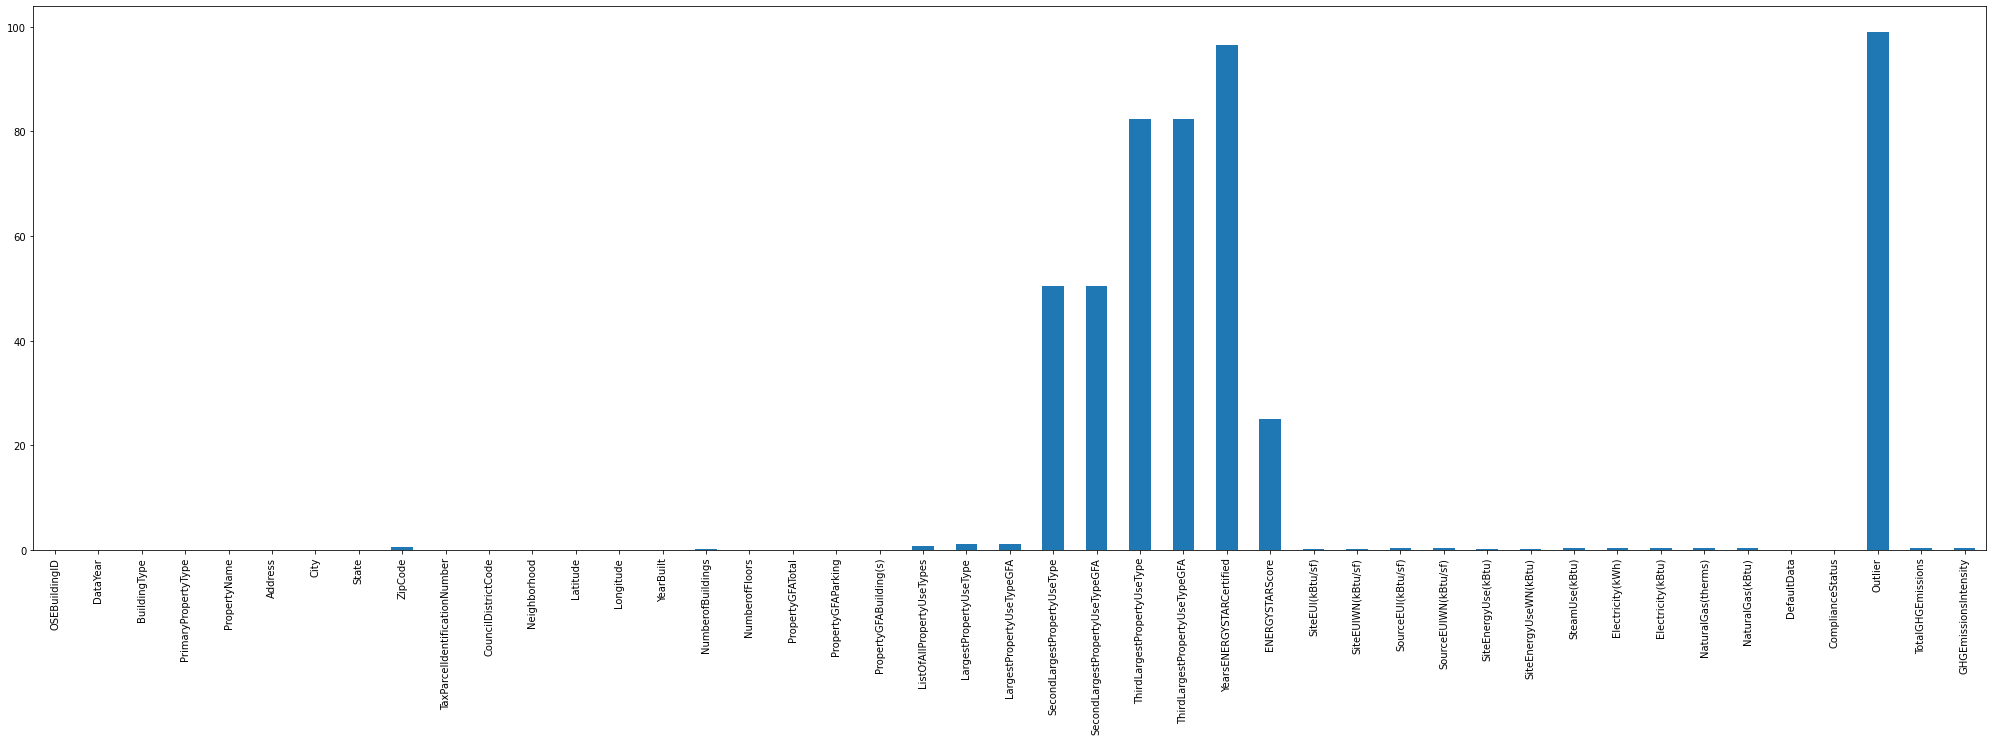

In [10]:
# Calcul du pourcentage de valeurs manquantes par colonne
missing_value = (
    df_2016_with_missing_buildings_from_2015
    .apply(lambda x: x.isnull().value_counts()/df_2016_with_missing_buildings_from_2015.shape[0]*100)
    .T[True]
)
# Création d'un barplot des pourcentages de valeurs manquantes par colonne
missing_value_plot = (
    missing_value
    .plot(kind = "bar", figsize = (35,10))
)

Selon le graphe ci-dessus, les colonnes 'outlier' et 'YearsENERGYSTARCertified' ne sont pas renseignées à plus de 90%. Ces variables vont donc être supprimées pour le reste de l'étude.
Les variables concernant les superficies et usages des plus grandes pièces vont être corrigé dans la suite de ce notebook.

In [11]:
# Supression des colonnes 
(
    df_2016_with_missing_buildings_from_2015
    .drop(columns =['Outlier', 'YearsENERGYSTARCertified'], 
          inplace = True)
)

In [12]:
# Recherche et affichage des doublons
(
    df_2016_with_missing_buildings_from_2015[df_2016_with_missing_buildings_from_2015['OSEBuildingID']
                                             .isin(df_2016_with_missing_buildings_from_2015['OSEBuildingID']
                                                   [df_2016_with_missing_buildings_from_2015['OSEBuildingID']
                                                    .duplicated()])]
)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity


### [Vérification du format des variables](#sommaire)<a class="anchor" id="12"></a>

In [ ]:
# Vérifier les formats des variables 
df_2016_with_missing_buildings_from_2015.info()

La variable 'OSEBuildingID' est la variable d'identification des bâtiments. La variable CouncilDistrictCode est aussi une variable qualitative.

In [13]:
# Changer le format des variables en str.
df_2016_with_missing_buildings_from_2015['OSEBuildingID']=(
    df_2016_with_missing_buildings_from_2015['OSEBuildingID']
    .astype(str)
)
df_2016_with_missing_buildings_from_2015['CouncilDistrictCode']=(
    df_2016_with_missing_buildings_from_2015['CouncilDistrictCode']
    .astype(str)
)

Les variables 'latitude' et longitude' sont en string, elles devraient être en 'Float' puisque ce sont des décimales.

In [14]:
# Changer les variables de type géographique en float
df_2016_with_missing_buildings_from_2015['Latitude']=(
    df_2016_with_missing_buildings_from_2015['Latitude']
    .astype(float)
)
df_2016_with_missing_buildings_from_2015['Longitude']=(
    df_2016_with_missing_buildings_from_2015['Longitude']
    .astype(float)
)

### [Imputation des variables](#sommaire)<a class="anchor" id="13"></a>

#### [Imputation par des valeurs d'une variable connue](#sommaire)<a class="anchor" id="14"></a>

Quand PropertyGFAParking est positif, on considère que le parking peut être renseigné en SecondLargestPropertyUse. Les valeurs des colonnes 'SecondLargestPropertyUseTypeGFA' et 'SecondLargestPropertyUseType' sont remplacées en conséquence.

In [15]:
# Imputer les valeurs manquantes de 'SecondLargestPropertyUseType' par la valeur 'parking' quand il y en a un
df_2016_with_missing_buildings_from_2015.loc[
    (df_2016_with_missing_buildings_from_2015['PropertyGFAParking'] > 0) 
     & (df_2016_with_missing_buildings_from_2015['SecondLargestPropertyUseType']
        .isnull()),
    'SecondLargestPropertyUseType'
] = 'Parking'

# Imputer les superficies de 'SecondLargestPropertyUseType' par la valeur du parking
df_2016_with_missing_buildings_from_2015.loc[
    (df_2016_with_missing_buildings_from_2015['SecondLargestPropertyUseType'] == 'Parking'),
         'SecondLargestPropertyUseTypeGFA'
] = df_2016_with_missing_buildings_from_2015['PropertyGFAParking']

#### [Uniformisation des valeurs manquantes](#sommaire)<a class="anchor" id="15"></a>

Pour uniformiser les valeurs non renseignées, on cherche dans le datfarame si des valeurs sont déjà utilisés pour les valeurs nulle.

In [16]:
# Création d'un dataframe pour vérifier les valeurs nulles dans la colonne 'SecondLargestPropertyUseTypeGFA'
unknown = (
    df_2016_with_missing_buildings_from_2015[
    df_2016_with_missing_buildings_from_2015[
        'SecondLargestPropertyUseTypeGFA']
    .isnull()]
)

In [17]:
unknown['SecondLargestPropertyUseType'].unique()

array([nan], dtype=object)

Les valeurs manquantes des colonnes'SecondLargestPropertyUseType,'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA' sont remplacées par des valeurs plus appropriées: 0 lorsqu'il s'agit d'une surface et 'None' lorsqu'il s'agit de décrire le type de pièce.

In [18]:
df2016_result = (
    df_2016_with_missing_buildings_from_2015
    .fillna(value={'SecondLargestPropertyUseType': 'None', 
                   'SecondLargestPropertyUseTypeGFA': 0, 
                   'ThirdLargestPropertyUseType': 'None',
                   'ThirdLargestPropertyUseTypeGFA': 0}
           )
)

#### [Correction des valeurs à plusieurs orthographes](#sommaire)<a class="anchor" id="16"></a>

Dans certaines colonnes ('PrimaryPropertyType','BuildingType','Neighborhood') , il y a des orthographes différentes pour la même valeur. Ces fautes sont corrigées.

In [19]:
# Cette librairie permet d'ignorer la case dans la recherche .str.contains
import re

# A partir des .loc et .str.contains, les valeurs des cases sont modifiées
df2016_result.loc[
    (df2016_result['BuildingType'].str.contains('nonresidential', flags=re.IGNORECASE, regex=True)),
         'BuildingType'
] = 'NonResidential'

df2016_result.loc[
    (df2016_result['PrimaryPropertyType'].str.contains('restaurant', flags=re.IGNORECASE, regex=True)),
         'BuildingType'
] = 'Restaurant'

df2016_result.loc[
    (df2016_result['PrimaryPropertyType']=='Restaurant\n'), 
    'PrimaryPropertyType'
] = 'Restaurant'

df2016_result.loc[
    (df2016_result['Neighborhood'].str.contains('DELRIDGE', flags=re.IGNORECASE, regex=True)),
         'Neighborhood'
] = 'Delridge'

df2016_result['Neighborhood']=df2016_result['Neighborhood'].str.lower()

### [Filtration des données](#sommaire)<a class="anchor" id="17"></a>

#### [Suppression des données non-conformes](#sommaire)<a class="anchor" id="18"></a>

La colonne 'Compliance Status' indique si les données sont exploitables. Les lignes dont les données sont manquantes ou possèdent des erreurs ne représentent que 5% du jeu de données. On décide de les supprimer.

In [ ]:
# Combien de données ne sont pas conformes?
df2016_result.groupby(['ComplianceStatus']).count()

In [20]:
# Apication d'un filtre sur les données 'compliant'
df2016_compliantfilter = df2016_result[df2016_result['ComplianceStatus']=='Compliant']

#### [Vérification de la fiabilité des mesures](#sommaire)<a class="anchor" id="19"></a>

Selon les règles métiers, le total d'énergie consommé doit être la somme des 3 énergies (Electricity(kBtu), Steam et Gaz).
Une quatrième valeur d'énergie (Other par exemple) qui est la différence de Total - Somme des 3 énergies est créée pour calculer une quatrième énergie ou les erreurs.

In [21]:
#Création de la colonne 'Other' pour calculer soit l'erreur sur 'SiteEnergyUse(kBtu)' 
# ou une quatrième énergie non relevées dans le document
df2016_compliantfilter ['Other'] = (
    df2016_compliantfilter['SiteEnergyUse(kBtu)']-
    (df2016_compliantfilter ['Electricity(kBtu)']+
     df2016_compliantfilter ['SteamUse(kBtu)']+
     df2016_compliantfilter ['NaturalGas(kBtu)']
     )
)

<ipython-input-21-a6908af311d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016_compliantfilter ['Other'] = (


In [22]:
#  Calculer le pourcentage de valeurs négatives dans la colonne Other
negatives_percent = (
len(df2016_compliantfilter.loc[
    (df2016_compliantfilter.Other < 0)])/
(df2016_compliantfilter['Other'].shape[0])
*100
)
print('Il y a '+ str(negatives_percent)+'% de valeurs négatives dans la colonne "Other".')

Il y a 26.048362411998777% de valeurs négatives dans la colonne "Other".


In [23]:
# Mise en place d'un seuil à 0.01% de la valeur d'énergie
treshold = df2016_compliantfilter['SiteEnergyUse(kBtu)']*(-0.0001)

# Remplacer par 0 les valeurs inférieures au treshold (erreur négligeable)
df2016_compliantfilter.loc[
        (df2016_compliantfilter['Other'] >= treshold)
        &(df2016_compliantfilter['Other'] <= 0),
        'Other'
] = 0

# Créer un dataframe avec seulement les données supérieur ou égale à 0
df_2016_coherent = df2016_compliantfilter[df2016_compliantfilter['Other']>=0]

C:\Users\neury\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Le dataframe présente encore des valeurs négatives d'émission et des valeurs très élevés de TotalGHGEmission. On vérifie les lignes où sont présentes ces outliers et on les supprime comme elles ne sont pas nombreuses. 

In [24]:
df_2016_coherent[df_2016_coherent['TotalGHGEmissions']<0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Other
3262,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122,7234600195,3,central,47.61432,-122.31257,2013,1.0,6.0,52000,0,52000,Office,Office,48159.0,None,0.0,None,0.0,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,False,Compliant,-0.8,-0.02,458143.0938


In [25]:
df_2016_coherent[df_2016_coherent['TotalGHGEmissions']>10000]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Other
91,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108,0022000005,2,greater duwamish,47.534930,-122.317880,1992,1.0,3.0,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,False,Compliant,16870.98,34.09,29.0
226,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104,8590900220,3,east,47.603990,-122.323770,2000,9.0,8.0,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,0.0,None,0.0,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,Compliant,10734.57,9.26,21.0
674,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122,1978201096,3,east,47.608951,-122.322402,1994,7.0,14.0,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,0.0,None,0.0,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,Compliant,12307.16,6.97,28.0
3330,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105,1625049001,4,northeast,47.656440,-122.310410,1900,111.0,0.0,9320156,0,9320156,College/University,College/University,9320156.0,None,0.0,None,0.0,NaN,93.800003,0.000000,246.600006,0.000000,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.000000e+00,0.0,False,Compliant,11140.56,1.20,131864083.0


In [26]:
df_2016_coherent.drop(3330, axis = 0, inplace = True)
df_2016_coherent.drop(3262, axis = 0, inplace = True)

C:\Users\neury\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## [Exploration des variables](#sommaire)<a class="anchor" id="20"></a>

L'objectif de ce projet est de prédire les émissions des gaz à effet de serre des bâtiments à partir des caractéristiques des bâtiments en estimant leur consommation énergétique.

### [Sélection des variables qualitatives](#sommaire)<a class="anchor" id="21"></a>

Pour sélectionner les variables qualitatives qui vont nous permettre de prédire les émissions GHGE, nous allons choisir les variables qualitatives qui caractérisent les bâtiments et qui présentent le moins de modalité.

In [ ]:
# Nombre de modalités des variables qualitatives
df_2016_coherent.describe(exclude='number').loc['unique',:]

En regardant la liste précédente sur le nombre de modalités des variables, on choisit de travailler sur des variables qui présentent peu de modalités: 'BuildingType', 'PrimaryPropertyType' et 'Neighborhood'.

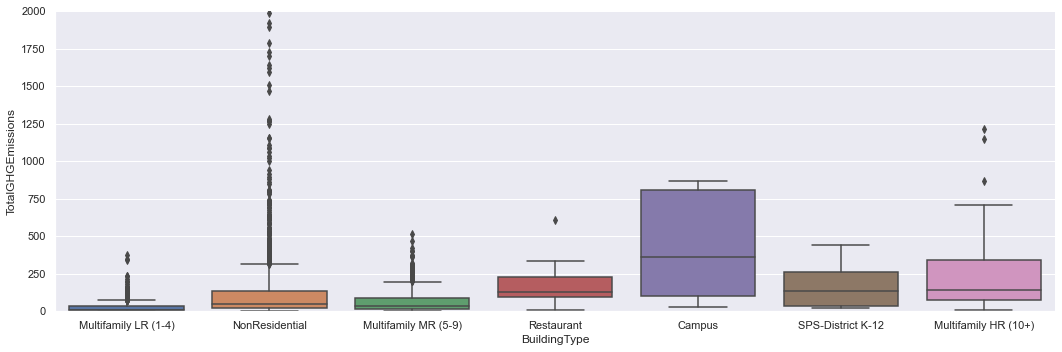

In [46]:
ax = sns.catplot(x= 'BuildingType', y= 'TotalGHGEmissions', data= df_2016_coherent, kind="box",height = 5,aspect = 3 )
ax.set(ylim=(0,2000))

On remarque sur le graphe ci-dessus que le type de bâtiment impact l'émission de carbone. Le type Campus semble présenter les émissions les plus fortes. Le type de bâtiment 'non résidentiel' semble montrer la plus grande variance d'émission de carbone.

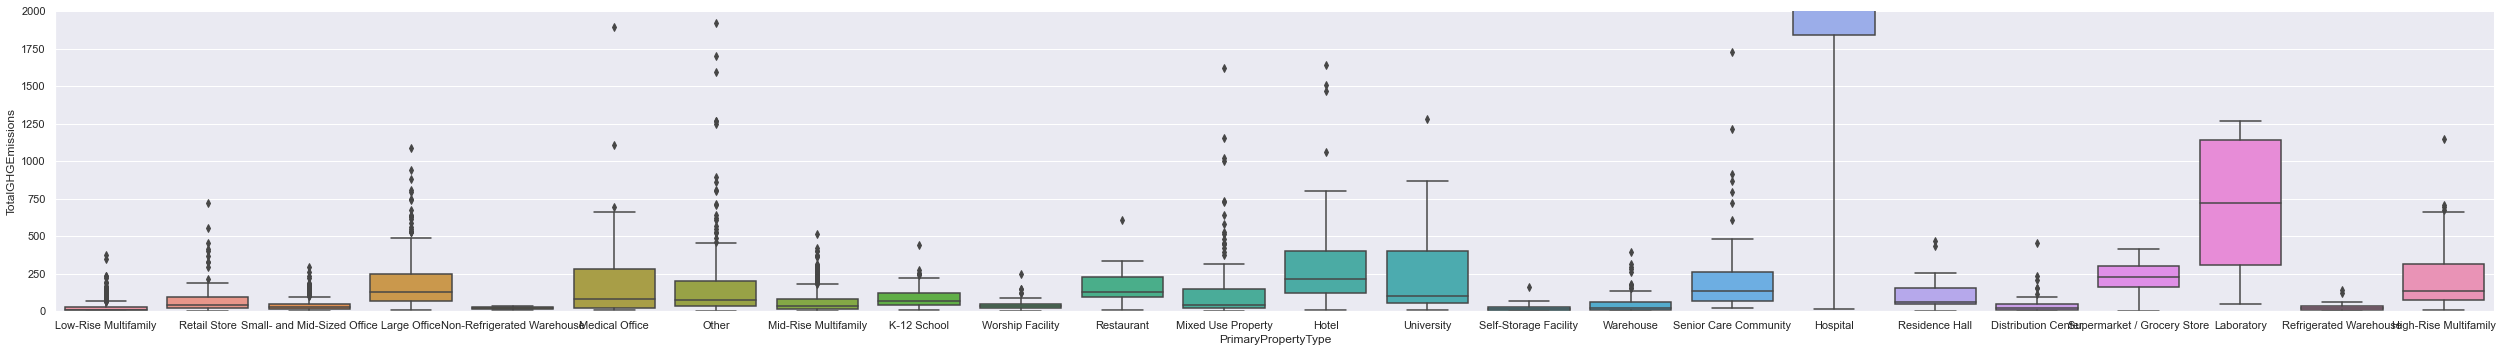

In [48]:
ax = sns.catplot(x= 'PrimaryPropertyType', y= 'TotalGHGEmissions', data= df_2016_coherent, kind="box",height = 5,aspect = 7 )
ax.set(ylim=(0,2000))

On remarque sur le graphe ci-dessus que la fonction des bâtiments impacte aussi les émissions de carbone. En effet, les hôpitaux et les laboratory ci dessus présente les valeurs d'émissions les plus élevées.

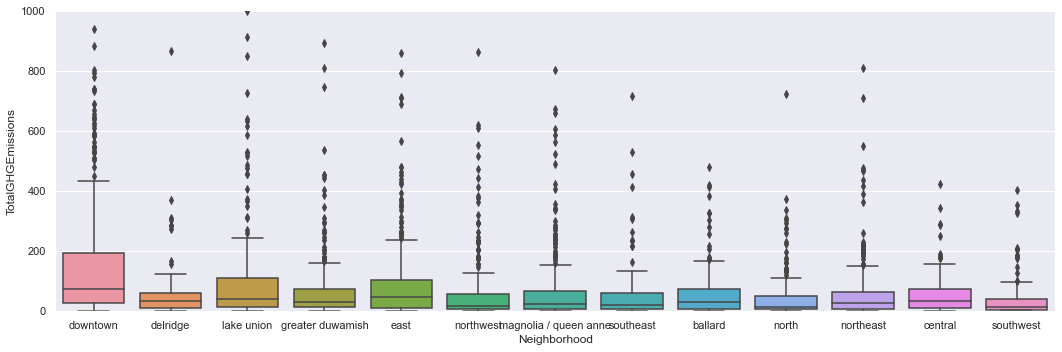

In [45]:
ax = sns.catplot(x= 'Neighborhood', y= 'TotalGHGEmissions', data= df_2016_coherent, kind="box",height = 5,aspect = 3 )
ax.set(ylim=(0,1000))

### [Sélection des variables quantitatives](#sommaire)<a class="anchor" id="22"></a>

#### [Corrélations entre variables](#sommaire)<a class="anchor" id="23"></a>

Pour sélectionner les variables quantitatives, nous allons analyser les corrélations entre les variables avec les corrélations de pearson. Les variables qui sont le plus corrélées entre-elles sont écartées du reste de l'analyse.

In [38]:
# Sélectionner les variables numériques (quantitatives)
df_numerics = df_2016_coherent.select_dtypes(include=np.number)

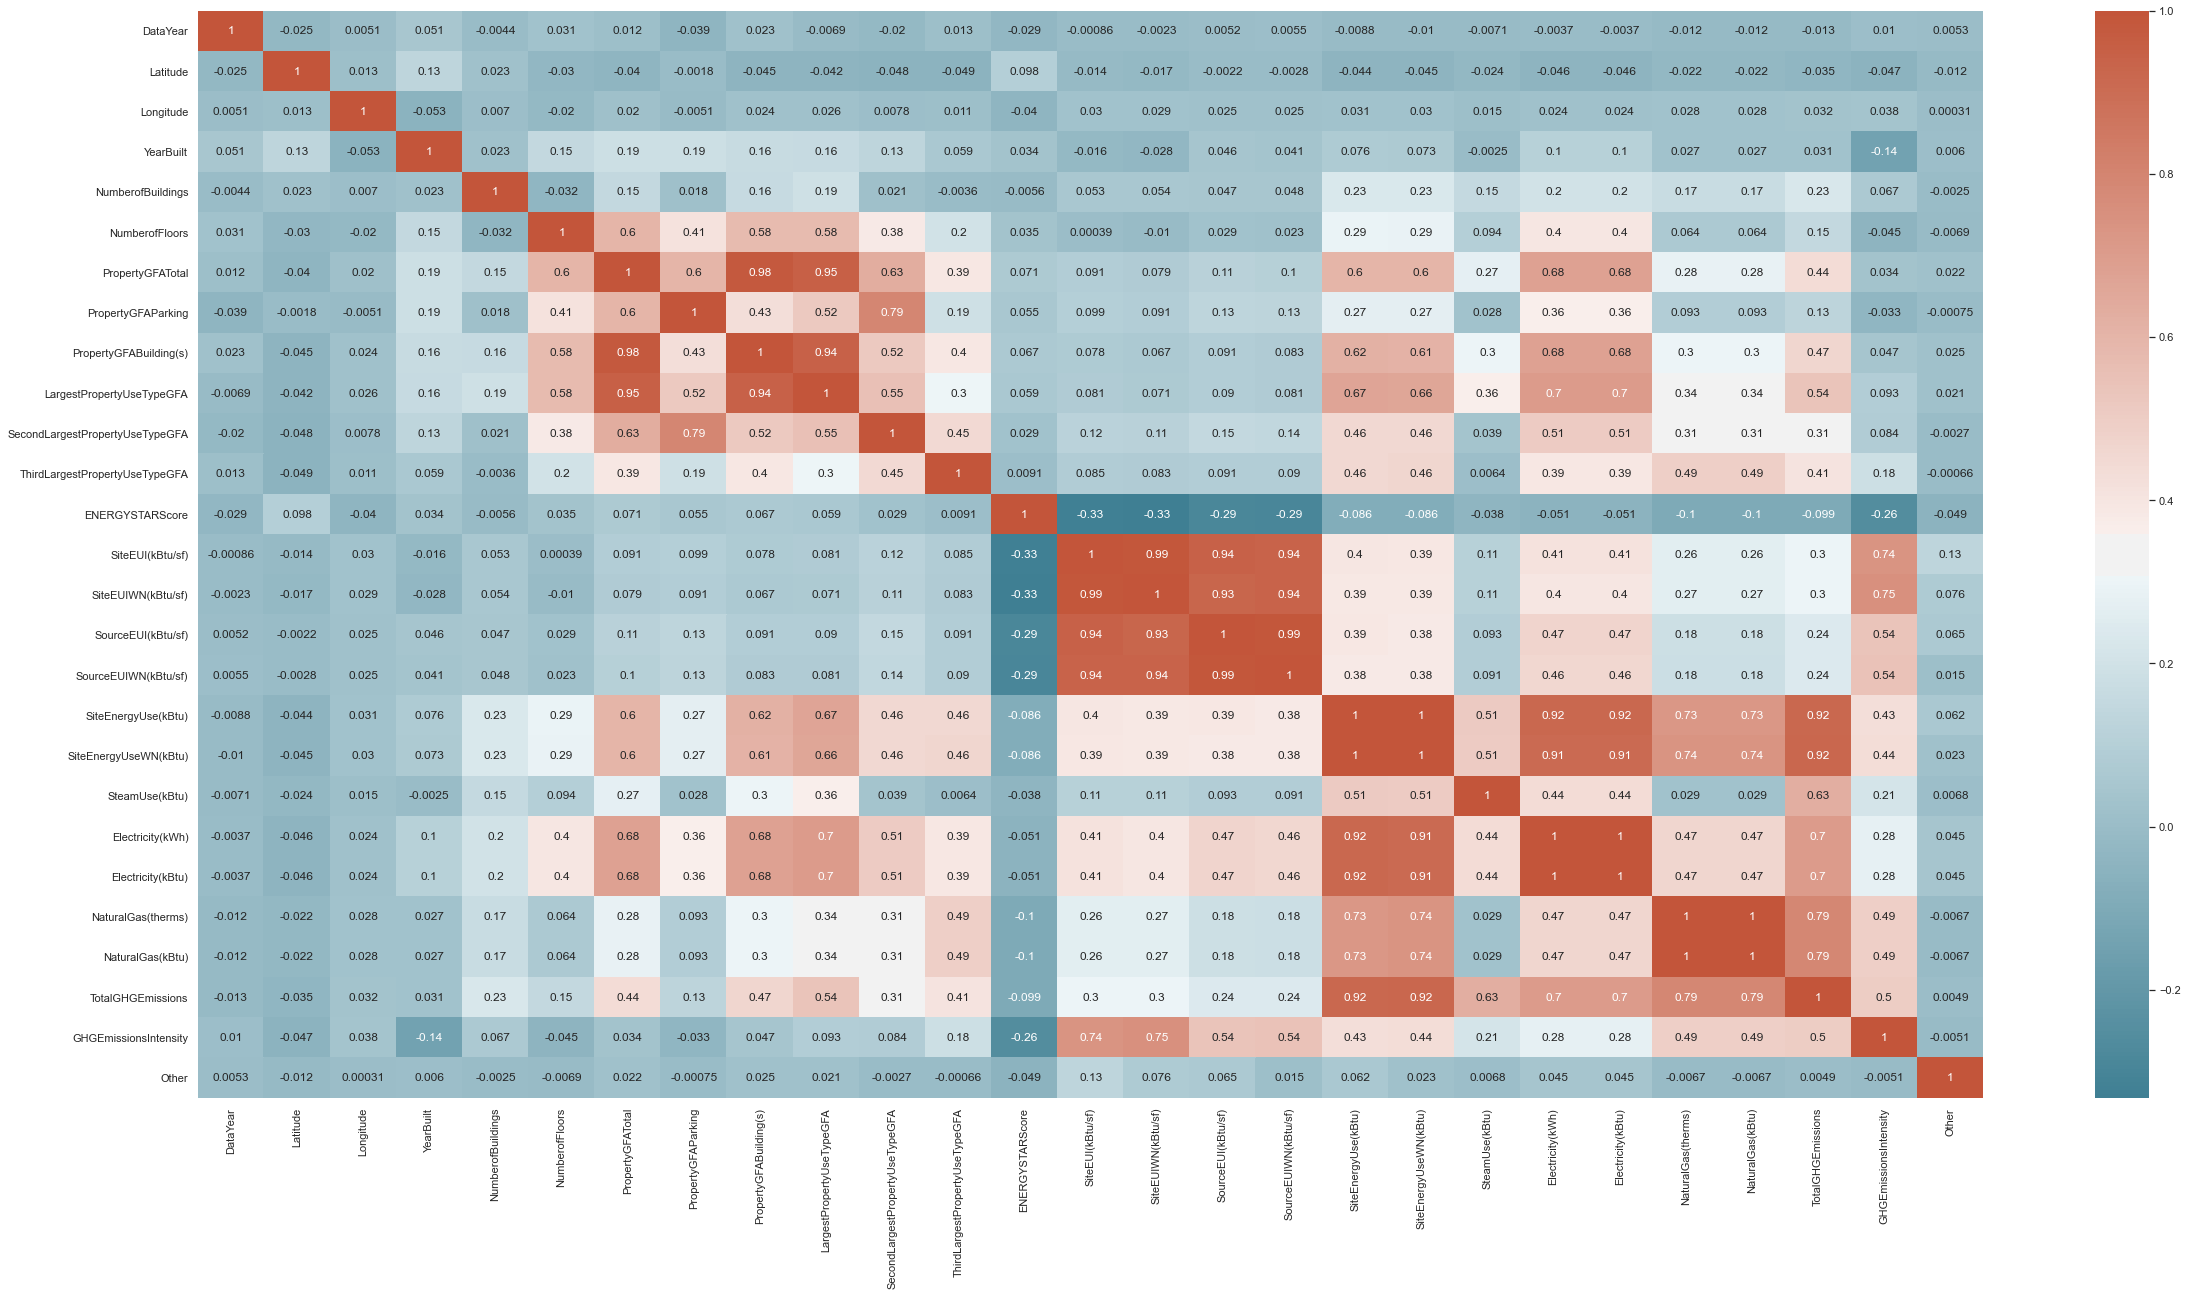

In [39]:
# Calculer les corrélation de pearson
corr = df_numerics.corr()
sns.set(rc={'figure.figsize':(40,20)})
# Illustrer les corrélations
matrix_corr = sns.heatmap(
    corr, 
    xticklabels = df_numerics.columns, 
    yticklabels = df_numerics.columns, 
    annot = True, 
    cmap = sns.diverging_palette(220, 20, as_cmap = True)
)


Cette matrice des corrélations permet de faire une premier tri sur les variables quantitatives. On remarque que les variables: 'SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)','NaturalGas(therms)', sont fortement corrélées aux variables du même nom, seules les unités sont modifiées. Ces informations redondantes sont donc écartées. On décide de garder les variable de consommation énergétique de la même unité le kbtu. Les variables 'DataYear', 'Latitude' et 'Longitude' sont aussi écartées car elles ne sont pas corrélés avec le reste des variables (proche de 0) et ne présentent pas d'indication pertinentes. la variable 'SourceEUI(kbtu/sf)' est aussi écarté du reste de l'analyse. Elle présente une forte corrélation avec la variable 'SiteEUI(kbtu/sf)' et concerne les énergies consommées pour produire les énergies utilisées par les bâtiments. Or, pour cette étude, nous nous intéressonts plus particulièrement aux énergies consommées sur les sites en fonction des caractéristiques des bâtiments. Les variables 'PropertyGFATotal', 'PropertyGFABuilding(s)' et 'LargestPropertyUseTypeGFA' sont très fortement corrélés et désignent toutes la plus grande superficie des bâtiments. Nous allons garder pour la suite de l'analyse la variable 'PropertyGFATotal'.

In [49]:
(
    df_2016_coherent
    .drop(columns = [
        'DataYear',
        'Latitude',
        'Longitude',
        'SiteEUIWN(kBtu/sf)',
        'SourceEUIWN(kBtu/sf)',
        'SiteEnergyUseWN(kBtu)',
        'Electricity(kWh)',
        'NaturalGas(therms)',
        'SourceEUI(kBtu/sf)',
        'PropertyGFABuilding(s)',
        'LargestPropertyUseTypeGFA'], 
          inplace = True)
)

C:\Users\neury\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
df_2016_coherent.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Other
0,61,Multifamily LR (1-4),Low-Rise Multifamily,GATEWOOD APTS,107 PINE ST,SEATTLE,WA,98101,1975700600,7,...,61.0,2953338.0,915977.0,1448859.0,588563.0,No,Compliant,112.06,2.19,0.0
1,266,Multifamily LR (1-4),Low-Rise Multifamily,WEST SEATTLE COMM. RESOURCE CENTER/FOOD BANK A...,6500 35TH AVE SW,SEATTLE,WA,98126,9271000000,1,...,23.3,1212551.0,0.0,1212601.0,0.0,Yes,Compliant,8.45,0.06,0.0
2,325,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,400 PINE ST,SEATTLE,WA,98101,659000005,7,...,60.6,9898724.0,0.0,9899135.0,0.0,No,Compliant,69.01,0.24,0.0
3,400,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1201 2ND AVE,SEATTLE,WA,98101,1974700175,7,...,66.3,6525887.0,0.0,6488262.0,37893.0,No,Compliant,47.24,0.20,0.0
4,442,NonResidential,Large Office,KING BROADCASTING,333 DEXTER AVE N,SEATTLE,WA,98109,1991200870,7,...,105.8,16760217.0,0.0,16760914.0,0.0,No,Compliant,116.84,0.23,0.0


#### [Distribution des variables](#sommaire)<a class="anchor" id="24"></a>

Une fois les variables quantitatives sélectionnées, nous allons observer la distribution de ces dernières pour voir si un transformation est nécessaire pour les analyses suivantes.

In [50]:
# Sélectionner les variables numériques (quantitatives)
df_numerics = df_2016_coherent.select_dtypes(include=np.number)

C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


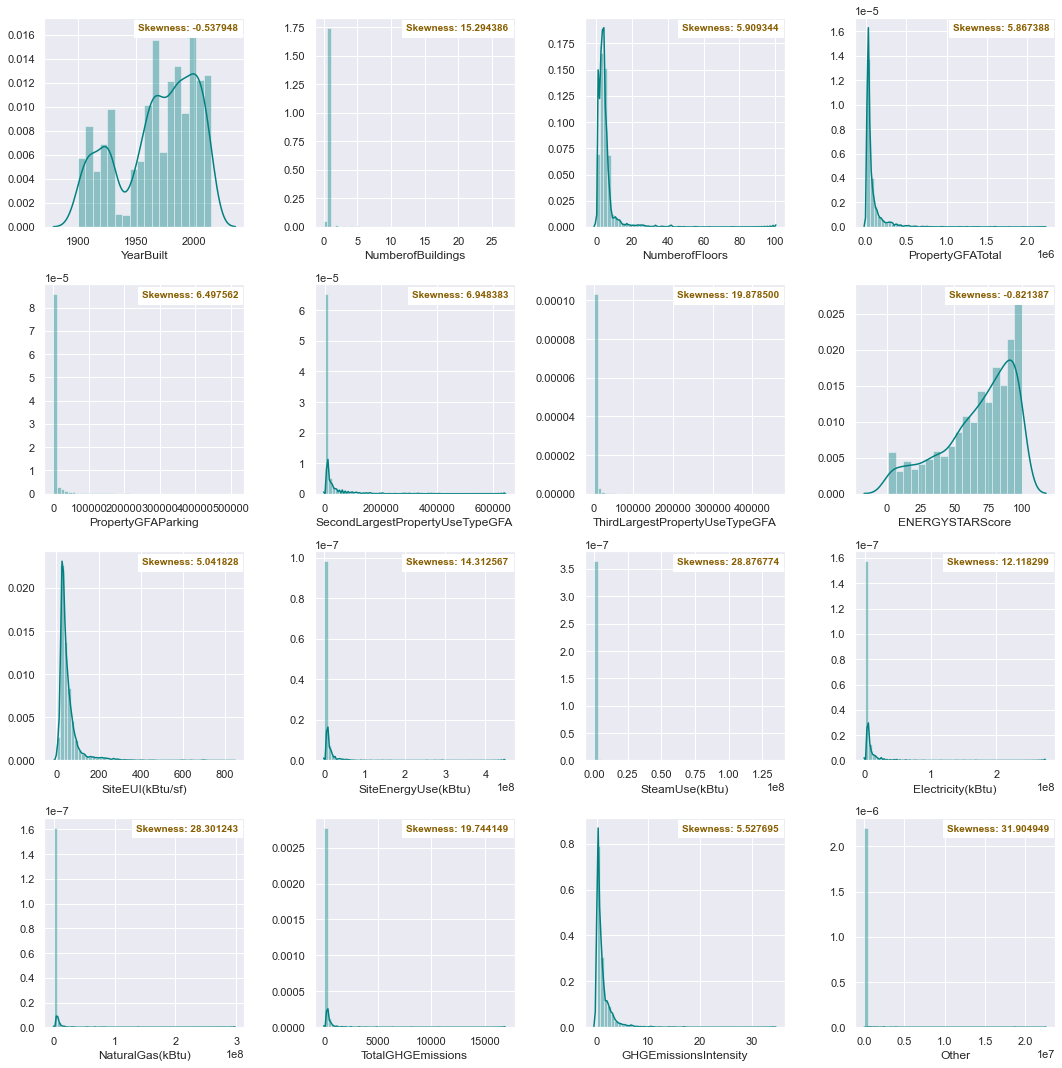

In [51]:
# Courbe de densité des variables et calcul du skewness
f, axes = plt.subplots(4, 4, figsize=(15,15))
sns.distplot(df_numerics.iloc[:,0], color="teal", ax=axes[0,0])
sns.distplot(df_numerics.iloc[:,1], color="teal", ax=axes[0,1])
sns.distplot(df_numerics.iloc[:,2], color="teal", ax=axes[0,2])
sns.distplot(df_numerics.iloc[:,3], color="teal", ax=axes[0,3])
sns.distplot(df_numerics.iloc[:,4], color="teal", ax=axes[1,0])
sns.distplot(df_numerics.iloc[:,5], color="teal", ax=axes[1,1])
sns.distplot(df_numerics.iloc[:,6], color="teal", ax=axes[1,2])
sns.distplot(df_numerics.iloc[:,7], color="teal", ax=axes[1,3])
sns.distplot(df_numerics.iloc[:,8], color="teal", ax=axes[2,0])
sns.distplot(df_numerics.iloc[:,9], color="teal", ax=axes[2,1])
sns.distplot(df_numerics.iloc[:,10], color="teal", ax=axes[2,2])
sns.distplot(df_numerics.iloc[:,11], color="teal", ax=axes[2,3])
sns.distplot(df_numerics.iloc[:,12], color="teal", ax=axes[3,0])
sns.distplot(df_numerics.iloc[:,13], color="teal", ax=axes[3,1])
sns.distplot(df_numerics.iloc[:,14], color="teal", ax=axes[3,2])
sns.distplot(df_numerics.iloc[:,15], color="teal", ax=axes[3,3])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df_numerics.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.tight_layout()

#### [Transformation des valeurs](#sommaire)<a class="anchor" id="25"></a>

Le skewness est l'indicateur d'assymétrie de distribution des valeurs. Lorsque l'assymétrie, suit la loi normale de distribution, cet indicateur est compris entre -2 et 2. Sur les variables quantitatives précendentes, on remqraue qu'elles présentent en général des valeurs de skewness hors des bornes préalablement indiquées. Une transformation logarithmique des valeurs  va nous permettre de lisser les distribution des variables. Comme beaucoup de valeurs sont égales à 0 dans le dataframe, nous allons utiliser la transformation log(x+1).

In [52]:
# Transformation des données en log(x+1) pour celles dont le skewness n'est pas compris entre -2 et 2
for i in df_numerics.columns:
    if df_numerics[i].skew()>=2:
        newcol = i + 'log'
        df_2016_coherent[newcol]=np.log(df_numerics[i]+1)

<ipython-input-52-ba69db184da4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016_coherent[newcol]=np.log(df_numerics[i]+1)


Pour vérifier les nouveaux skewness suite aux transformations, on illustre de nouveau la distribution des variables modifiées.

In [53]:
df_log = df_2016_coherent.iloc[:,33:47]
df_log.head()

,NumberofBuildingslog,NumberofFloorslog,PropertyGFATotallog,PropertyGFAParkinglog,SecondLargestPropertyUseTypeGFAlog,ThirdLargestPropertyUseTypeGFAlog,SiteEUI(kBtu/sf)log,SiteEnergyUse(kBtu)log,SteamUse(kBtu)log,Electricity(kBtu)log,NaturalGas(kBtu)log,TotalGHGEmissionslog,GHGEmissionsIntensitylog,Otherlog
0,0.693147,1.609438,10.786924,0.000000,9.231319,0.000000,4.127134,14.898447,13.727748,14.186288,13.285441,4.727919,1.160021,0.0
1,0.693147,1.609438,10.861592,0.000000,0.000000,0.000000,3.190476,14.008238,0.000000,14.008279,0.000000,2.246015,0.058269,0.0
2,0.693147,1.609438,11.617988,0.000000,0.000000,0.000000,4.120662,16.107917,0.000000,16.107958,0.000000,4.248638,0.215111,0.0
3,0.693147,1.945910,11.496501,10.162809,10.162809,0.000000,4.209160,15.691288,0.000000,15.685505,10.542548,3.876189,0.182322,0.0
4,0.693147,1.609438,12.174525,10.541518,10.541518,9.320718,4.670958,16.634519,0.000000,16.634560,0.000000,4.769328,0.207014,0.0


C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\neury\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


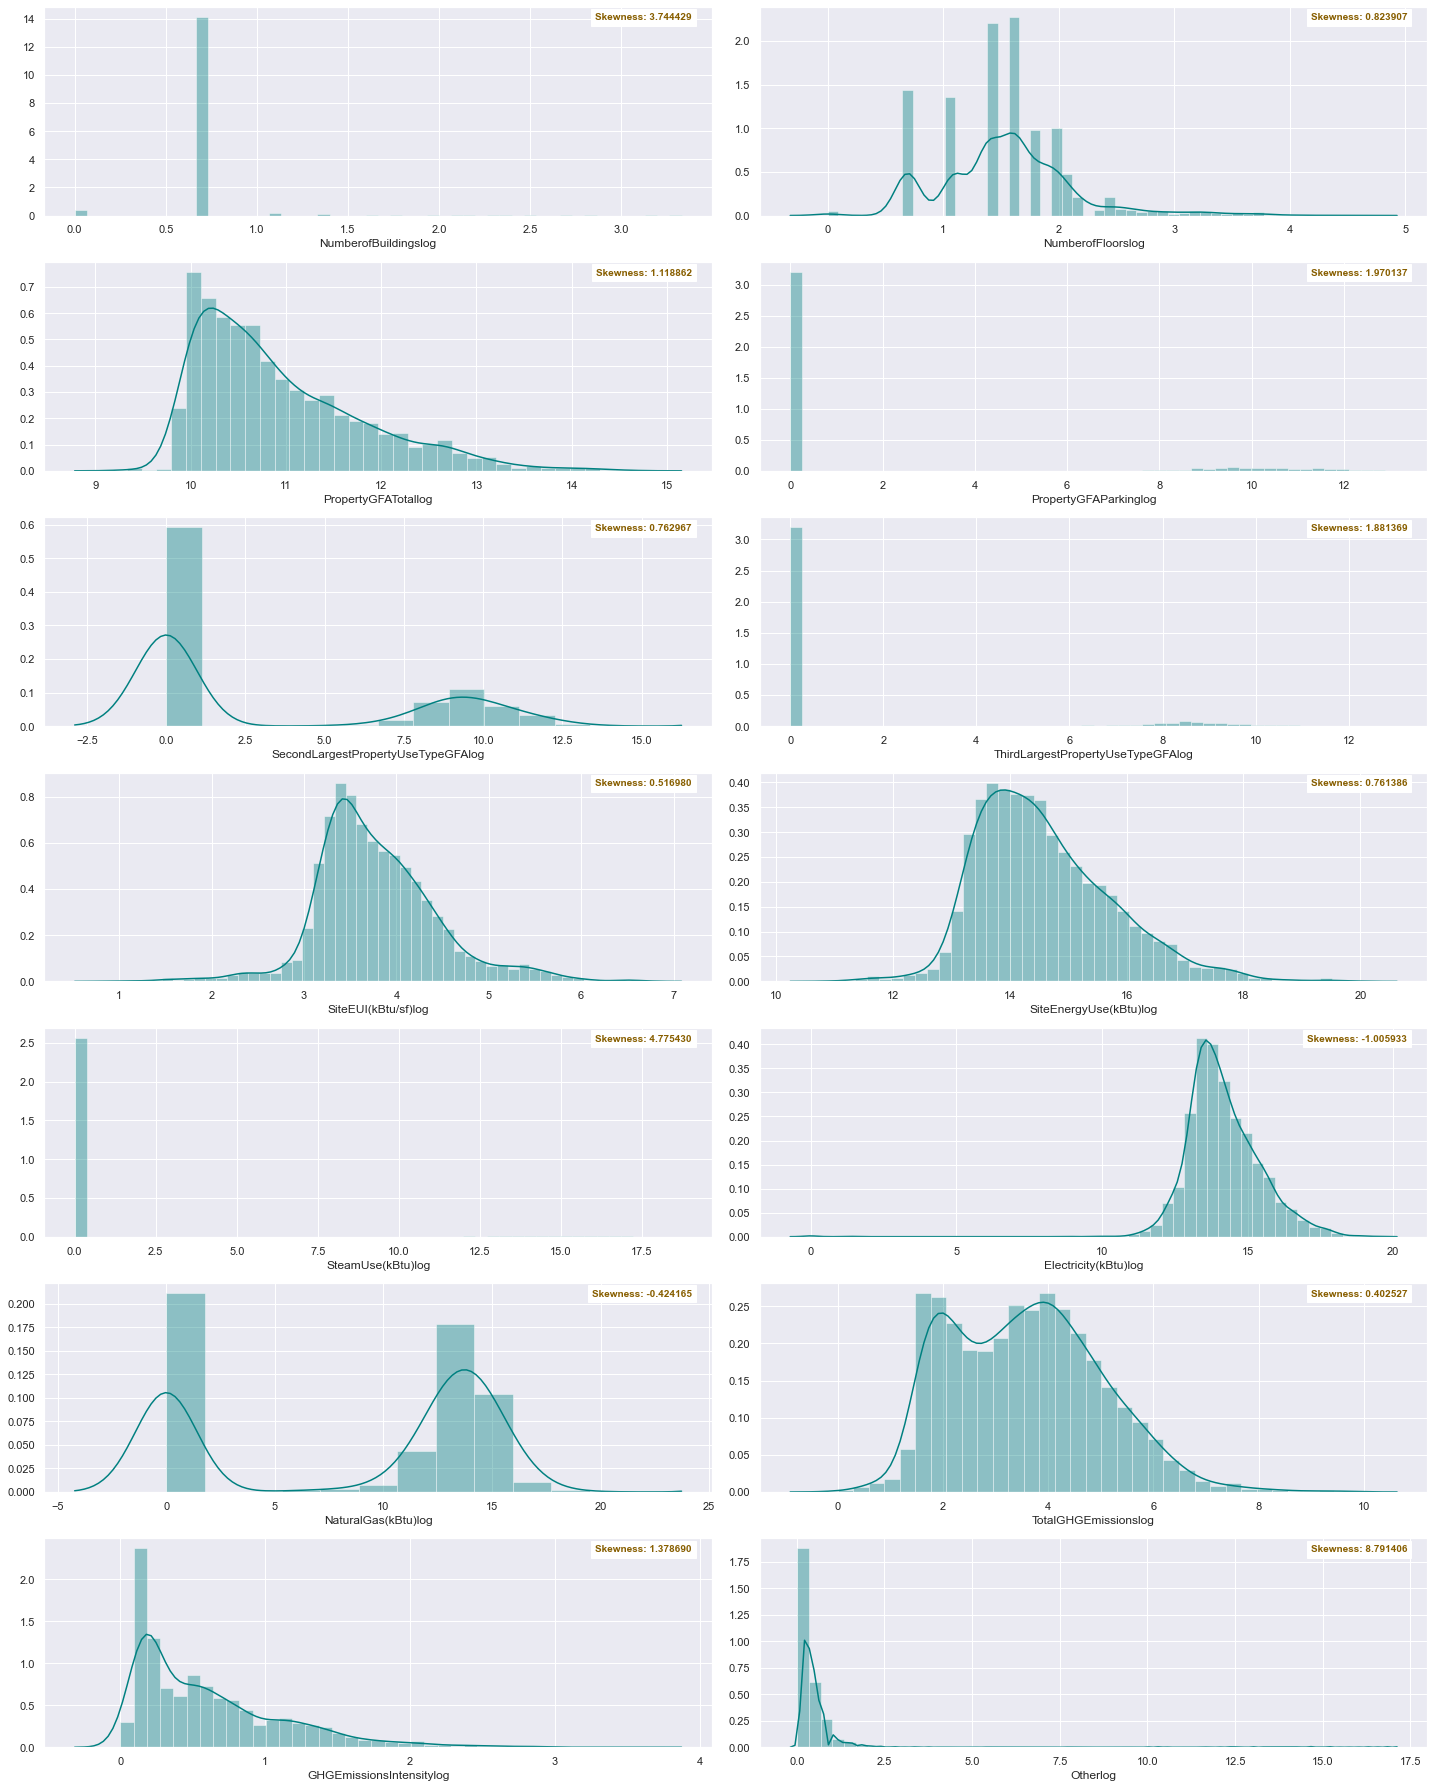

In [54]:
f, axes = plt.subplots(7, 2, figsize=(20,25))
sns.distplot(df_log.iloc[:,0], color="teal", ax=axes[0,0])
sns.distplot(df_log.iloc[:,1], color="teal", ax=axes[0,1])
sns.distplot(df_log.iloc[:,2], color="teal", ax=axes[1,0])
sns.distplot(df_log.iloc[:,3], color="teal", ax=axes[1,1])
sns.distplot(df_log.iloc[:,4], color="teal", ax=axes[2,0])
sns.distplot(df_log.iloc[:,5], color="teal", ax=axes[2,1])
sns.distplot(df_log.iloc[:,6], color="teal", ax=axes[3,0])
sns.distplot(df_log.iloc[:,7], color="teal", ax=axes[3,1])
sns.distplot(df_log.iloc[:,8], color="teal", ax=axes[4,0])
sns.distplot(df_log.iloc[:,9], color="teal", ax=axes[4,1])
sns.distplot(df_log.iloc[:,10], color="teal", ax=axes[5,0])
sns.distplot(df_log.iloc[:,11], color="teal", ax=axes[5,1])
sns.distplot(df_log.iloc[:,12], color="teal", ax=axes[6,0])
sns.distplot(df_log.iloc[:,13], color="teal", ax=axes[6,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df_log.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.tight_layout()

La transformation des données a permis d'améliorer la symétrie de distribution des variables sauf pour les variables 'NumberofBuildings', 'SteamUse' et 'Other'.

## [Export au format csv](#sommaire)<a class="anchor" id="26"></a>

Toutes les variables qui vont servir à l'estimation des émissions de carbone dans la partie suivante sont regroupées dans un dataframe et exportées au format csv.

In [55]:
df_2016_coherent.to_csv(r'C:\Users\neury\Documents\Python\P4\sorties\df_clean.csv')

## [Conclusion](#sommaire)<a class="anchor" id="27"></a>

Ce notebook a permis de nettoyer les données et sélectionner les variables les plus pertinentes quant à la suite du projet. 

Dans les notebook suivants, nous allons chercher à prédire le comportement des émissions de carbone des bâtiments en fonction des variables catégorielles (caractéristiques des bâtiments), en testant plusieurs algorithmes, pour ne retenir que le plus précis.

Dans le dataframe 'df_clean' ont donc été gardées les variables qualitative de caractéristiques des bâtiments en termes de  catégorie, de fonction et de localisation. La majeure partie des variables quantitatives ont subi une transformation logarithmique. Les variables qui étaient fortement corrélés entre-elles ou celles qui présentaient les mêmes informations avec des unités différentes ont été écartées pour les futures analyses. Les consommations énergétiques seront exprimées en kBtu et seule les consommations sur site sont prises en compte. 